# chemo-pharmaco analyzis Notebook

In [1]:
from pathlib import Path

import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from downloader import BASE_CLASS, get_classes, COMPOUNDS, PHARMACOLOGY, sorted_keys, load_results

sns.set_theme(style="darkgrid")

In [2]:
# main constants

INPUT_MATRIX = Path("results/activity.csv")
CSV_PARAMS = {"delimiter": ";", "quotechar": '"'}

CHEMO_MAP = get_classes(COMPOUNDS)
PHARM_MAP = get_classes(PHARMACOLOGY)
CHEMO_CLS_NB = sum(1 for cls in CHEMO_MAP.values() if cls == BASE_CLASS)
PHARM_CLS_NB = sum(1 for cls in PHARM_MAP.values() if cls == BASE_CLASS)

MIN_CITATIONS_THRESHOLD = 100
FIG_SIZE = (16, 12)

DEBUG:scopus_api:get_classes(data\compounds.csv)
DEBUG:scopus_api:get_classes(data\pharmacology.csv)


In [3]:
chemo_cls = sorted_keys(CHEMO_MAP, base_only=True)
pharm_cls = sorted_keys(PHARM_MAP, base_only=True)
chemo_sub = sorted_keys(CHEMO_MAP, base_only=False)[CHEMO_CLS_NB::]
pharm_sub = sorted_keys(PHARM_MAP, base_only=False)[PHARM_CLS_NB::]


citations = load_results(
    INPUT_MATRIX, chemo_cls_nb=len(chemo_cls), pharm_cls_nb=len(pharm_cls), pharm_nb=len(PHARM_MAP)
)
[[chemo_cls_pharm_cls, chemo_cls_pharm_sub], [chemo_sub_pharm_cls, chemo_sub_pharm_sub]] = citations

DEBUG:scopus_api:load_results(results\activity.csv)
DEBUG:scopus_api:5 chemo classes
DEBUG:scopus_api:11 pharm classes
INFO:scopus_api:dimensions of matrices (5, 11) (5, 29) (53, 11) (53, 29)


In [4]:
df = pd.DataFrame.from_records(chemo_sub_pharm_sub, index=chemo_sub, columns=pharm_sub)

# filters out rows (compounds) and cols (pharmaco/allelopathy classes)
# without at least MIN_CITATIONS_THRESHOLD citations
df = df.loc[df.sum(axis=1) >= MIN_CITATIONS_THRESHOLD, df.sum(axis=0) >= MIN_CITATIONS_THRESHOLD]

# the "unpivoted" version
pdf = pd.melt(
    df.reset_index(), ignore_index=True, var_name="pharmacology", value_name="nb", id_vars="index"
)
pdf.rename(columns={"index": "compound"}, inplace=True)



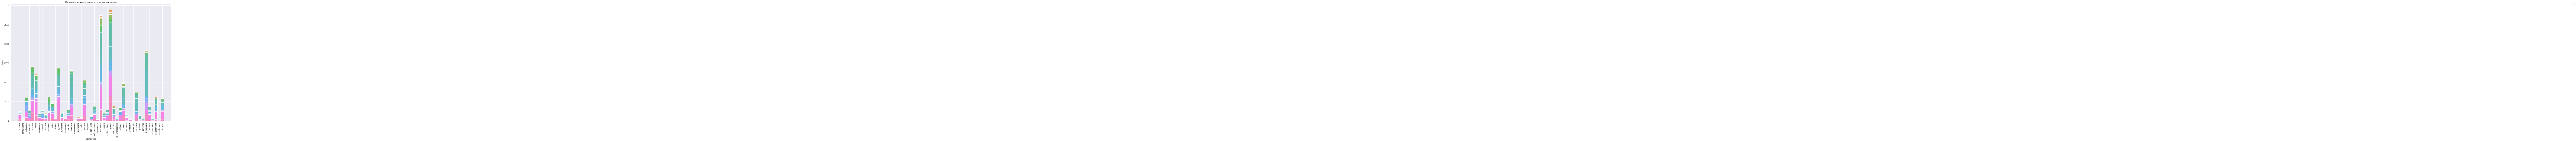

In [14]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.xticks(rotation=90)
plt.title("Cumulative number of papers by chemical compounds")
# plt.tight_layout()
sns.histplot(
    pdf,
    discrete=True,
    multiple="stack",
    x="compound",
    hue="pharmacology",
    stat="count",
    weights="nb",
    element="bars",
    shrink=0.9,
    palette=sns.color_palette(palette="husl", n_colors=len(df.columns)),
)
ax.legend(bbox_to_anchor=(FIG_SIZE[0], 1), borderaxespad=0)
plt.show()
